## Air.csv collector in one file
- 
- 

In [1]:
import os
import glob
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dir_work = os.getcwd()

# data 자동저장 폴더
dir_data = os.path.join(dir_work, *['static', 'data',])
dir_data_collect = os.path.join(dir_work, *['static', 'data', 'collect',])
dir_data_trash   = os.path.join(dir_work, *['static', 'data', 'trash',])

# 이미지 결과 자동저장 폴더
dir_img = os.path.join(dir_work, *['static', 'img',])
dir_img_heatmap = os.path.join(dir_work, *['static', 'img', 'heatmap',])
dir_img_nulschool = os.path.join(dir_work, *['static', 'img', 'nulschool',])
dir_img_plot_plot = os.path.join(dir_work, *['static', 'img', 'plot_plot',])
dir_img_plot_scatter = os.path.join(dir_work, *['static', 'img', 'plot_scatter',])
dir_img_test = os.path.join(dir_work, *['static', 'img', 'test',])

In [3]:
# NOW_DATE
# datetime.datetime.now() # ... datetime.datetime(2019, 1, 7, 18, 21, 13, 734730)

NOW_DATE = datetime.datetime.strftime(
                    datetime.datetime.now(),
                    '%Y%m%d_%a_%H00',
                    )                       # '20190107_Mon_1800'

YEAR = NOW_DATE[:4]
MONTH= NOW_DATE[4:6]
DAY  = NOW_DATE[6:8]
WEEK = NOW_DATE[9:12]
HOUR = NOW_DATE[-4:-2]

SAVE_LOG  = f"{YEAR}{MONTH}{DAY}_{WEEK}_{HOUR}00"     #'20190107_Mon_1800'
SAVE_LOG1 = f"{YEAR}{MONTH}{DAY}_{HOUR}00_{WEEK}"     #'20190107_1800_Mon'

In [4]:
data_path = os.path.join(os.getcwd(),'static', 'data')
all_files = glob.glob(os.path.join(data_path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

_list = []
for _file in all_files:
    _df = pd.read_csv(_file, index_col='TIMES', header=0)
    _list.append(_df)

In [5]:
df = pd.concat(_list, axis=0, ignore_index=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 2019.01/08(Tue)-01:00 to 2019.01/08(Tue)-17:00
Data columns (total 7 columns):
Time     208 non-null object
SO2      208 non-null float64
NO2      208 non-null float64
O3       208 non-null float64
CO       208 non-null float64
PM10     208 non-null int64
PM2.5    208 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.0+ KB


In [6]:
print(df.shape)
df.head()

(208, 7)


,Time,SO2,NO2,O3,CO,PM10,PM2.5
TIMES,,,,,,,
2019.01/08(Tue)-01:00,2019-01-08 01:00:00,0.007,0.015,0.029,0.8,54,34.0
2019.01/08(Tue)-02:00,2019-01-08 02:00:00,0.006,0.012,0.037,0.7,36,22.0
2019.01/08(Tue)-03:00,2019-01-08 03:00:00,0.007,0.011,0.031,0.7,32,19.0
2019.01/08(Tue)-04:00,2019-01-08 04:00:00,0.008,0.017,0.025,0.6,34,22.0
2019.01/08(Tue)-05:00,2019-01-08 05:00:00,0.010,0.023,0.020,0.7,37,22.0


## 단계별 변환을 한번에 바꿈
- dfd = **df.drop_duplicates**(subset='TIMES', keep='first') # ... (128, 11)
 > 1. dfs = **dfd.set_index**('TIMES')    
 >    파생변수: TIMES ... 오름/내림차순 정리가 쉽다 (언제든 다시 만들수 있다.) ... O
 > 1. dfs = **dfd.sort_values**(by=['TIMES'], ascending=1, axis=0)    
 >    **PLOT** 을 할때 인덱스를 따라가기 때문에, 인덱스 정렬이 필요하다 .... NG
- dfn = **dfs.filter**(items=['TIMES', 'Time', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5'])

In [7]:
# dfd = df.drop_duplicates(subset='TIMES', keep='first')
# dfd.shape                      # (128, 11)
# dfs = dfd.sort_values(by=['TIMES'], ascending=1, axis=0)
# dfn = dfs.filter(items=['TIMES', 'Time', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5'])


dfn = df.drop_duplicates(
            # subset='TIMES',      # TIMES 가 인덱스로 걸려서, 활용불가!
            subset='Time', 
            keep='first',
        )\
    .sort_values(
            by=['TIMES'], 
            ascending=1, 
            axis=0,
        )


#     .filter(
#         items=[
#             'TIMES', 
#             'Time', 
#             'SO2', 
#             'NO2', 
#             'O3', 
#             'CO', 
#             'PM10', 
#             'PM2.5'],
#         )\

#     .set_index('TIMES')

# dfn.info()

In [8]:
dfn.head()

,Time,SO2,NO2,O3,CO,PM10,PM2.5
TIMES,,,,,,,
2019.01/02(Wed)-01:00,2019-01-02 1:00,0.006,0.017,0.025,0.5,30,18.0
2019.01/02(Wed)-02:00,2019-01-02 2:00,0.006,0.018,0.025,0.5,30,18.0
2019.01/02(Wed)-03:00,2019-01-02 3:00,0.006,0.028,0.015,0.6,35,22.0
2019.01/02(Wed)-04:00,2019-01-02 4:00,0.005,0.039,0.005,0.7,40,26.0
2019.01/02(Wed)-05:00,2019-01-02 5:00,0.005,0.039,0.005,0.7,43,28.0


In [9]:
dfn.tail()

,Time,SO2,NO2,O3,CO,PM10,PM2.5
TIMES,,,,,,,
2019.01/09(Wed)-19:00,2019-01-09 19:00:00,0.007,0.053,0.002,0.7,55,26.0
2019.01/09(Wed)-20:00,2019-01-09 20:00:00,0.007,0.051,0.002,0.8,55,27.0
2019.01/09(Wed)-21:00,2019-01-09 21:00:00,0.009,0.050,0.002,0.7,51,26.0
2019.01/09(Wed)-22:00,2019-01-09 22:00:00,0.009,0.045,0.002,0.7,54,28.0
2019.01/09(Wed)-23:00,2019-01-09 23:00:00,0.007,0.045,0.002,0.7,53,28.0


In [10]:
# dfn['PM10'].index.tolist()

In [11]:
# 그래프 함수의 정의
print(dfn.index[-1])

dates = dfn.index.tolist()
x_index = [date if i==0 or i%24 == 0 else '' for i, date in enumerate(dates)]

def df_plot(df_column): 
    # plt.figure(figsize=(10,4))
    plt.plot(df_column)
    """ 그래프에 텍스트를 입히는 옵션 """
    plt.title("DATA PLOTTING")        # 타이틀
    plt.xlabel('TIMES')                      # x 라벨
    plt.ylabel(df_column.name)                   # y 라벨
    plt.legend()
    plt.xticks(x_index, rotation=90)

2019.01/09(Wed)-23:00


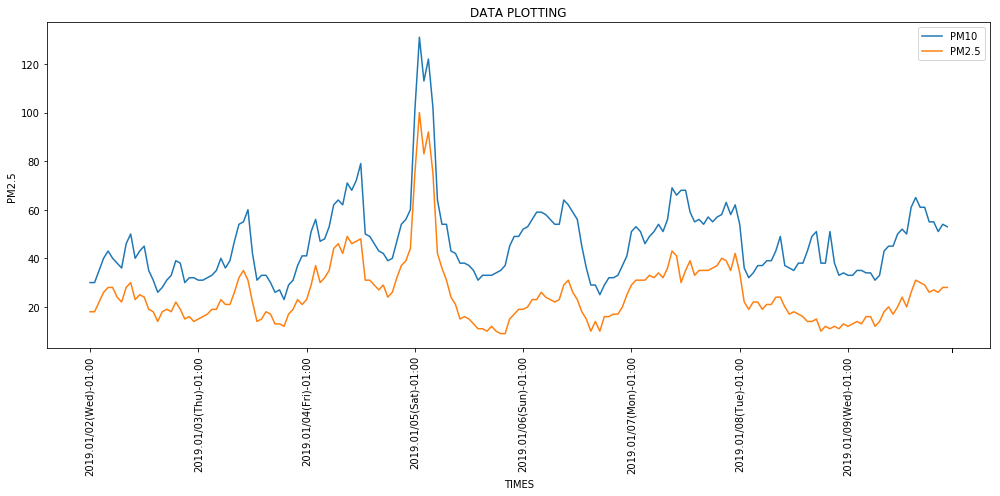

In [12]:
plt.figure(figsize=(14,7))
[df_plot(dfn[col]) for col in ['PM10', 'PM2.5',]]

plt.tight_layout()
plt.savefig(dir_img + f'/plot_total_{SAVE_LOG1}.png')
plt.show()

In [13]:
NOW_DATE = dfn.index[-1]    # '2019.01/06(Sun)-16:00'
print(f"The Last ... {NOW_DATE} \n")


YEAR = NOW_DATE[:4]
MONTH= NOW_DATE[5:7]
DAY  = NOW_DATE[8:10]
WEEK = NOW_DATE[11:14]
HOUR = NOW_DATE[-5:-3]
SAVE_LOG = f"{YEAR}{MONTH}{DAY}_{WEEK}_{HOUR}00"

print(f"마지막 기록 = {YEAR}년 {MONTH}월 {DAY}일 ({WEEK}) {HOUR}:00")
print(SAVE_LOG)

The Last ... 2019.01/09(Wed)-23:00 

마지막 기록 = 2019년 01월 09일 (Wed) 23:00
20190109_Wed_2300


In [14]:
os.path.join(data_path)

'C:\\Users\\nitt0\\Documents\\Github\\web_beautifulsoup_scrapping\\jupyter_air\\static\\data'

In [15]:
# Data Frame 을 엑셀로 저장한다. (CSV화일)
file_name = f"_air_{SAVE_LOG}.csv"
dfn.to_csv(os.path.join(data_path, file_name), sep=',', encoding='utf-8')